In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# read in data
df = pd.read_csv('./data/simpsons_episodes.csv')

In [3]:
print(df.shape)
df.head()

(600, 13)


,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
0,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.3,50816.0,7.4,1511.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879
1,12,Krusty Gets Busted,1990-04-29,7G12,1,12,12,30.4,62561.0,8.3,1716.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/288019523914
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.6,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671
3,17,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01,7F01,2,4,17,26.1,64959.0,8.1,1457.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260537411822
4,19,Dead Putting Society,1990-11-15,7F08,2,6,19,25.4,50691.0,8.0,1366.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459670


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


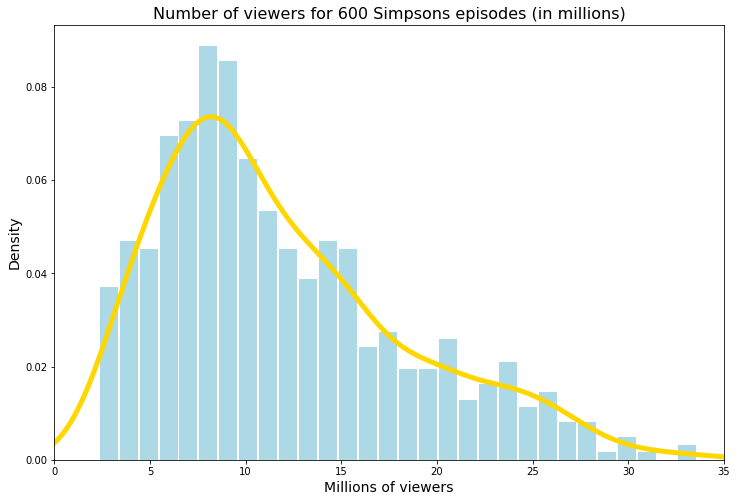

In [5]:
fig = plt.figure(figsize=(12,8))
plt.hist(df.us_viewers_in_millions, bins=30, density=True, color='lightblue', rwidth=0.9)
df.us_viewers_in_millions.plot.kde(color='gold', linewidth=5)
plt.xlim([0,35])
plt.xlabel('Millions of viewers', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Number of viewers for 600 Simpsons episodes (in millions)', fontsize=16)
plt.savefig('./plots/histogram.png', bbox_inches='tight')
plt.show()

In [119]:
len(list(df2.value)+list(df2.value))

1200

In [142]:
df1 = df[['id', 'imdb_rating', 'title', 'season']].sort_values('id').reset_index(drop=True)
df1.columns = ['episode','value', 'title', 'Season']

df2 = df[['id', 'us_viewers_in_millions', 'title', 'season']].sort_values('id').reset_index(drop=True)
df2.columns = ['episode','value', 'title', 'Season']

df3 = pd.concat([df1, df2])
df3.loc[:,'Category'] = ['IMDB Rating']*600 + ['US Viewers (millions)']*600
df3.loc[:,'IMDB Rating'] = list(df1['value'])+list(df1['value'])
df3.loc[:,'US Viewers'] = list(df2['value']) + list(df2['value'])
df3 = df3.sort_values(['episode', 'Category'])

In [143]:
print(df3.shape)
df3.head()

(1200, 7)


,episode,value,title,Season,Category,IMDB Rating,US Viewers
0,1,8.2,Simpsons Roasting on an Open Fire,1,IMDB Rating,8.2,26.7
0,1,26.7,Simpsons Roasting on an Open Fire,1,US Viewers (millions),8.2,26.7
1,2,7.8,Bart the Genius,1,IMDB Rating,7.8,24.5
1,2,24.5,Bart the Genius,1,US Viewers (millions),7.8,24.5
2,3,7.5,Homer's Odyssey,1,IMDB Rating,7.5,27.5


In [144]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [147]:
source = df3

alt.Chart(source).mark_area().encode(
    x='episode:O',
    y=alt.Y('value:Q', stack='zero', sort='ascending'),
    order='Category',
    color='Category:N',
    tooltip=['title', 'Season', 'IMDB Rating', 'US Viewers'],
).interactive()\
.save('./plots/stream.html')